# Lab 5: Graphs I

Lab associated with Module 5: Graphs I

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Coming up with a way to visualize the graph data and encode data in the graph

Let us come up with some example to work on

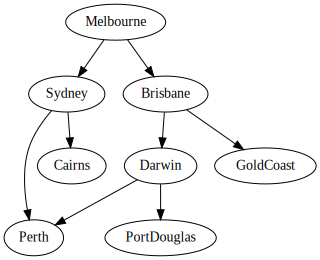

In [4]:
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')

#dot.view()
dot

This is pretty cool display, but we need to encode this information in a graph, let us try to do that in the following:

In [5]:
#Main node class
#Has 4 attributes: the value, neighbours in, neighbours out, and the status of the node
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

In [15]:
#Graph class has 1 attribute in the form of an array of vertices 
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

In [16]:
#Creates a graph called G
#Adds the vertices
G = Graph()
for i in range(10):
    G.addVertex( Node(i) )

In [17]:
#Creates a variable V for the vertices in graph G
#Adds the edges 9 of them
V = G.vertices
for i in range(9):
    G.addDiEdge( V[i], V[i+1] )

In [18]:
print(G)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,1) (1,2) (2,3) (3,4) (4,5) (5,6) (6,7) (7,8) (8,9) 



Okay, now that our implementation is working fine, let us try to plug-in our data

In [19]:
#Creates a graph G
#Plugs in each city as a vertex 8 in total
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )

In [20]:
#Creates a variable V for the G graphs vertices 
V = G.vertices

In [21]:
#Prints each city with its respective vertice number index
#8 total starting at index 0 
for i in range(len(V)):
    print(i, V[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


In [22]:
#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )

In [23]:
#Prints the graph G
print(G)

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 



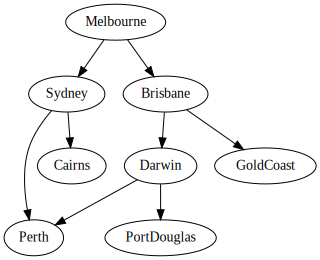

In [24]:
#Prints the visualisation of the graph in a tree form 
dot

Sounds beautiful, now we have the data in graph format. Let us see if you we can start coding our clever algorithms.

***

### Section 2: Doing a simple DFS

In [ ]:
'''
ORIGINAL VERSION PROVIDED NO CHANGES

def DFS(root):
    
    if root == Null:
        return

    root.visited = True

    for n in root.neighbours:
        if n.visited == False:
            DFS(n)
'''

In [25]:
#Simple DFS version
#If there is no value in the root the method returns
#Otherwise the root visited status flicks to true
#For every node of the roots neighbours the DFS explores and marks them as visited
#If any nodes are missed the DFS is recursively called for that node 
def DFS(root):
    
    #***Changed null to None
    if root == None:
        return

    root.status = "done"

    #Node has no attribute neighbours so I have added cases for both in and out neighbours
    for n in root.outNeighbors:
        if n.status == "unvisited":
            DFS(n)
    for n in root.inNeighbors:
         if n.status == "unvisited":
            DFS(n)
          

In [26]:
#A helper method that marks the progress level of the DFS
# w is simply the node at which the DFS starts 
#3 categories: in progress, unvisited, or done
def DFS_helper(w):
    
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            
            DFS_helper(v)
    
    print(w)
    w.status = "done"
    
#DFS method 2 takes the node at which the DFS starts and the graph as input
#Labels each vertex status as unvisited to start then calls the DFS helper to begin the DFS and change the status 
def DFS2(w, G):
    
    for v in G.vertices:
        
        v.status = "unvisited"
        
    return DFS_helper(w)

In [27]:
# Let us do the DFS from Melbourne
w = G.vertices[0]

DFS2(w, G)

Perth
Cairns
Sydney
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne


# Test Cases DFS

In [28]:
#Testing DFS(root) method accepted with no output like initial provided method
root = G.vertices[0]
DFS(root)

In [29]:
#Testing DFS(root) method accepted with no output like initial provided method
root1 = G.vertices[1]
DFS(root1)

In [30]:
#DFS2 from Brisbane  
w2 = G.vertices[2]

DFS2(w2, G) 

Perth
PortDouglas
Darwin
GoldCoast
Brisbane


In [33]:
#DFS2 from a non existent vertex (EXPECTING AN ERROR)
w3 = G.vertices[8]

DFS2(w3, G)

IndexError: list index out of range

In [34]:
#DFS2 from Cairns  
w4 = G.vertices[7]

DFS2(w4, G) 

Cairns


In [35]:
#DFS2 from Perth 
w5 = G.vertices[3]

DFS2(w5, G) 

Perth


In [36]:
#DFS2 from Sydney  
w6 = G.vertices[1]

DFS2(w6, G) 

Perth
Cairns
Sydney


In [37]:
#DFS2 from Darwin  
w7 = G.vertices[4]

DFS2(w7, G) 

Perth
PortDouglas
Darwin


In [38]:
#DFS2 from Port Douglas  
w8 = G.vertices[6]

DFS2(w8, G) 

PortDouglas


In [39]:
#DFS2 from GoldCoast  
w9 = G.vertices[5]

DFS2(w9, G) 

GoldCoast


### <font color='red'> Activity 1 - Code Reflections. </font>

In [ ]:
#### TODO ####
### Good Luck ###
'''
So far the code contains node and graph classes. The node class has 4 attributes: the value, neighbours in, neighbours out, and the status of the node (which is initially unvisited) 
The graph class has one attribute for its vertices which are kept in an array. The graph in question has 8 australian cities as vertexes. Each vertex is associated with an index number ranging from 0-7
The cities graph is directed. The direction of the edges has been individually defined using addDiEdge from the graph methods.
The DFS method takes any node from the graph and begins the DFS from there. It recursively calls itself for any unvisited neighbours of the provided node. 
Depending on which node inputted to the DFS method the output differs. Calling DFS from the root node Melbourne resulted in every vertex being explored.
Calling DFS from Cairns and Perth resulted in only those nodes being explored. This outcome is in line with the issues raised for DFS in the module content.
I noticed there are 2 DFS methods with the same name. The first DFS(root) and the second DFS(w, G). I renamed DFS(w,G) to DFS2(w, G) and attempted to run DFS(root) to compare my outputs. 
DFS(root) was the algorithm provided in the module. When I try and run it using vertex 0 from my graph (Melbourne) I get a name null not defined error. I changed null to None which fixed my previous error.
However, I now have a new error stating that the node object has no neighbours attribute. To fix this I added 2 cases 1 for in neighbours and 1 for out. I also had to change the visited attribute to status as this
is what is in the node class. I had the method recrusively call itself as was done in the provided algorithm.

'''

***

### Section 4: Breadth First Search (BFS)

Now let us see if we can do BFS on the graph

In [ ]:
'''
ORIGINAL BFS Algorithm from Module

def BFS(root):
    
    visited = [False] * (num_nodes_in_graph)
    
    # Create a queue for BFS
    queue = []

    queue.append(root)
    visited[root] = True
    
    while queue:
        r = queue.pop(0)
        print(r)

        for n in r.adjacent:
            
            if visited[n] == False:
            
                visited[n] = True
                queue.append(n) 
    
'''


In [40]:
#Option 1 for BFS from module
#Changed the name to Bfs and made adjustments 
#Created a variable num_nodes_in_graph from the graph vertices length

def Bfs(root):

    num_nodes_in_graph = len(G.vertices)
    visited = [False] * (num_nodes_in_graph)

    # Create a queue for BFS
    queue = []

    #The root is added to the queue and the status is changed 
    queue.append(root)
    root.status = "visited"

    while queue:

        r = queue.pop(0)
        print(r)

        for n in r.outNeighbors:
            
            if n.status == "unvisited":
                
                n.status = "visited"
                queue.append(n)
                
        for n in r.inNeighbors:
            if n.status == "unvisited":
                
                n.status = "visited"
                queue.append(n)

                              

In [41]:
#Option 2 for BFS takes a node and the graph as input
def BFS(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)

In [42]:
#Testing Bfs only prints the node specified as the root
root = G.vertices[0]
Bfs(root)

Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
PortDouglas


In [43]:
#Testing Bfs only prints the node specified as the root
root1 = G.vertices[7]
Bfs(root1)

Cairns


In [44]:
# Let us do the BFS from Melbourne
w = G.vertices[0]

BFS(w, G)

Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
GoldCoast
PortDouglas


# Test Cases BFS

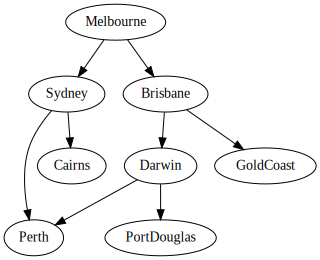

In [45]:
#Prints the visualisation of the graph in a tree form 
dot

In [46]:
#BFS from Cairns
w1 = G.vertices[7]

BFS(w1, G)

Cairns


In [47]:
#BFS from Sydney
w2 = G.vertices[1]

BFS(w2, G)

Sydney
Perth
Cairns


In [48]:
#BFS from PortDouglas
w3 = G.vertices[6]

BFS(w3, G)

PortDouglas


In [49]:
#BFS from Brisbane
w4 = G.vertices[2]

BFS(w4, G)

Brisbane
Darwin
GoldCoast
Perth
PortDouglas


In [50]:
#BFS from GoldCoast
w5 = G.vertices[5]

BFS(w5, G)

GoldCoast


In [51]:
#BFS from Perth
w6 = G.vertices[3]

BFS(w6, G)

Perth


In [52]:
#BFS from Darwin
w7 = G.vertices[4]

BFS(w7, G)

Darwin
Perth
PortDouglas


In [54]:
#BFS from a non existent Vertex (EXPECTING AN ERROR)
w8 = G.vertices[8]

BFS(w8, G)

IndexError: list index out of range

***

### <font color='red'> Activity 2 - Code Reflections. </font>

In [ ]:
#### TODO ####
### Good Luck ###
'''
The BFS algorithm is using the node and graph classes. There are 2 options. The first algorithm is the provided code from the module and since it has not been altered to fit with the node and graph classes
there are some errors arising. I have renamed this option to Bfs for simplicities sake. The first error is that the number of nodes in the graph is not defined. This is ocurring because this is not an attribute of 
the node class. To combat this error I added a variable that is the length of the graph vertices(8). I changed line 9 to instead use the root status. Instead of using r.adjacent I used r.outNeighbours
Instead of using T or F I updated the n.status. My output from this method ends up being the root inputted. I found the same ocurred when using G.vertices instead of r.outNeighbors

Option 2 takes in some node and the graph as input. I have noticed that BFS(w, G) printout first prints the w node given
followed by its left closest neighbour, then right closest neighbor, then its next level left closest neighbour, followed by its next level right closest neighbour.
This method works as expected. I prefer the second option as it clearly accounts for the graph in question
'''


### <font color='red'> Activity 3: Bidirectional search is used to find the shortest path between a source and a destination. It operates by essentially running two simultaneous breadth-first searches one from each node. When their searches collide, we have a match. Design an algorithm for bi-directional search, and then code it in this week's ipynb. </font>

# Creating a simple bidirectional graph to use for bidirectional search

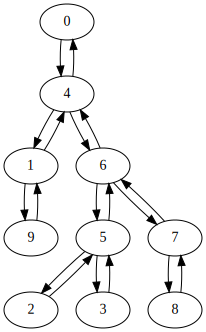

In [55]:
dotB = Digraph()

dotB.node("0")
dotB.node("1")
dotB.node("2")
dotB.node("3")
dotB.node("4")
dotB.node("5")
dotB.node("6")
dotB.node("7")
dotB.node("8")
dotB.node("9")

dotB.edges(['04'])
dotB.edges(['40'])
dotB.edges(['14'])
dotB.edges(['41'])
dotB.edges(['46'])
dotB.edges(['64'])
dotB.edges(['67'])
dotB.edges(['76'])
dotB.edges(['25'])
dotB.edges(['52'])
dotB.edges(['56'])
dotB.edges(['53'])
dotB.edges(['35'])
dotB.edges(['65'])
dotB.edges(['78'])
dotB.edges(['87'])
dotB.edges(['19'])
dotB.edges(['91'])

dotB

In [56]:
G4 = Graph()
for i in ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']:
    G4.addVertex( Node(i))

In [57]:
V4 = G4.vertices

In [58]:
for i in range(len(V4)):
    print(i, V4[i].value)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [59]:
#dot.edge (0,4)
G4.addDiEdge( V4[0], V4[4])

#dot.edge (4,0)
G4.addDiEdge( V4[4], V4[0])

#dot.edge (4,1)
G4.addDiEdge( V4[4], V4[1])

#dot.edge (1,4)
G4.addDiEdge( V4[1], V4[4])

#dot.edge (4,6)
G4.addDiEdge( V4[4], V4[6])

#dot.edge (6,4)
G4.addDiEdge( V4[6], V4[4])

#dot.edge (1,9)
G4.addDiEdge( V4[1], V4[9])

#dot.edge (9,1)
G4.addDiEdge( V4[9], V4[1])

#dot.edge (6,5)
G4.addDiEdge( V4[6], V4[5])

#dot.edge (5,6)
G4.addDiEdge( V4[5], V4[6])

#dot.edge (6,7)
G4.addDiEdge( V4[6], V4[7])

#dot.edge (7,6)
G4.addDiEdge( V4[7], V4[6])

#dot.edge (5,2)
G4.addDiEdge( V4[5], V4[2])

#dot.edge (2,5)
G4.addDiEdge( V4[2], V4[5])

#dot.edge (5,3)
G4.addDiEdge( V4[5], V4[3])

#dot.edge (3,5)
G4.addDiEdge( V4[3], V4[5])

#dot.edge (7,8)
G4.addDiEdge( V4[7], V4[8])

#dot.edge (8,7)
G4.addDiEdge( V4[8], V4[7])

In [60]:
print(G4)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,4) (1,4) (1,9) (2,5) (3,5) (4,0) (4,1) (4,6) (5,6) (5,2) (5,3) (6,4) (6,5) (6,7) (7,6) (7,8) (8,7) (9,1) 



In [61]:
#BFS from vertex 0
n = G4.vertices[0]

BFS(n, G4)

0
4
1
6
9
5
7
2
3
8


In [62]:
#BFS from vertex 8
n3 = G4.vertices[8]

BFS(n3, G4)

8
7
6
4
5
0
1
2
3
9


In [63]:
#BFS from vertex 2
n2 = G4.vertices[2]

BFS(n2, G4)

2
5
6
3
4
7
0
1
8
9


In [64]:
#### TODO ####
### Good Luck ###
#Takes a source and destination node from a Graph
#Source node traverses forwards and destination node traverses backwards **Interesection is the goal  
def BFSBi(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    array = []
    
    for i in range(n):
        for u in Ls[i]:
            
            #print(u)
            array.append(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)
    print(Ls )           
    return Ls
                

#Takes source, destination, and graph as input
#Has 2 lists one for the source vertices and another for the destination vertices
#Need to figure out how to label each list with sublist flags of some sort to then do a comparison
#If a node is found to be in both lists at the same level then thats the intersect otherwise no node

def Bidirectional(w, x, G):
    
    source = w
    destination = x
    
    w_queue = list()
    x_queue = list()
    
    w_queue.append(source)
    
    
    x_queue.append(destination)
    
    while w_queue and x_queue:
        #forward
        BFSBi(w, G)
        
        #backwards
        BFSBi(x, G)
        
        



In [65]:
#BFSBi from vertex 2
n2 = G4.vertices[2]

BFSBi(n2, G4)

[[<__main__.Node object at 0x000002539A1E5910>], [<__main__.Node object at 0x000002539A1E5F70>], [<__main__.Node object at 0x000002539A1E5E20>, <__main__.Node object at 0x000002539A1E5D60>], [<__main__.Node object at 0x000002539A1E5C70>, <__main__.Node object at 0x000002539A1E5850>], [<__main__.Node object at 0x000002539A41F9A0>, <__main__.Node object at 0x000002539A1E5B50>, <__main__.Node object at 0x000002539A1E5D30>], [<__main__.Node object at 0x000002539A1E57C0>], [], [], [], []]


[[<__main__.Node at 0x2539a1e5910>],
 [<__main__.Node at 0x2539a1e5e20>, <__main__.Node at 0x2539a1e5d60>],
 [<__main__.Node at 0x2539a1e5c70>, <__main__.Node at 0x2539a1e5850>],
 [],
 [],
 [],
 []]

***

### <font color='red'> Activity 4: Design an algorithm using BFS to determine if a graph is bi-partite. Modify the BFS code in this week's lab book, and implement your designed algorithm. </font>

# Creating a replica graph that should pass the bipartite test

In [66]:
G3 = Graph()
for i in range(7):
    G3.addVertex(Node(i))

In [67]:
V3= G3.vertices
#for i in range(6):
 #   G.addDiEdge(V3[i], V3[i+1])

In [68]:
G3 = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G3.addVertex( Node(i) )

In [69]:
V3 = G3.vertices

In [70]:
for i in range(len(V3)):
    print(i, V3[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Darwin
4 GoldCoast
5 PortDouglas
6 Cairns


In [71]:
#dot.edge('Melbourne', 'Sydney')
G3.addDiEdge( V3[0], V3[1] )

#dot.edge('Melbourne', 'Brisbane')
G3.addDiEdge( V3[0], V3[2] )

#dot.edge('Sydney', 'Cairns')
G3.addDiEdge( V3[1], V3[6] )

#dot.edge('Brisbane', 'Darwin')
G3.addDiEdge( V3[2], V3[3] )

#dot.edge('Brisbane', 'GoldCoast')
G3.addDiEdge( V3[2], V3[4] )

#dot.edge('Darwin', 'PortDouglas')
G3.addDiEdge( V3[3], V3[5] )

In [72]:
print(G3)

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,PortDouglas) 



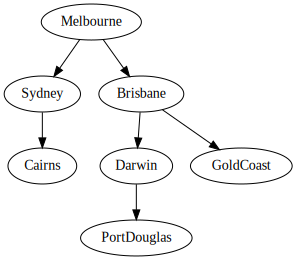

In [73]:
dot3 = Digraph()

dot3.edge('Melbourne', 'Sydney')
dot3.edge('Melbourne', 'Brisbane')
dot3.edge('Sydney', 'Cairns')
dot3.edge('Brisbane', 'Darwin')
dot3.edge('Brisbane', 'GoldCoast')
dot3.edge('Darwin', 'PortDouglas')

dot3

In [74]:
#### TODO ####
### Good Luck ###
#**** NEED TO COLOR EACH LEVEL IN ALTERNATING COLORS

'''
APPROACH 1 Original BFS CODE just needs altering 
def BFS(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)
'''

#Controller section assures that all nodes in the graph are assigned a color
#At first pass every node is assigned color 1
#At second pass every node that has color 1 is checked for neighbors, if possible it is then set to color 2
def isBipartite(G):
    #these are the colors set (-1, 0)
    color1 = -1
    color2 = 0

    for V in G.vertices:
        color[V] = color1
        
    for V in G.vertices:
        if color[V] == color1:
            if (not setColor(G, V, color2)):
                return False
    return True

#Helper method recursive code, checks if a node can be a part of a different color group than its neighbors
#Checks if v's neighbor w has a color 1 value then checks if its possible to assign it to color 2 

def setColor(G, v, c):
    color[v] = c
    
    for w in v.getOutNeighbors():
        if color[w] == -1:
            if setColor(G, w, 1-c) == False:
                return False
        else:
            if color[w] == c:
                return False
    return True



In [75]:
#Creates a color array
global color 
color = {}

In [76]:
#Testing the method on a Bipartite graph (CITIES GRAPH ALTERED), expecting True
isBipartite(G3)

True

In [77]:
#Testing the method on a non Bipartite graph (ORIGINAL CITIES GRAPH), expecting False
isBipartite(G)

False

In [80]:
#Testing the method on a non Bipartite graph (STANFORD GRAPH), expecting False
isBipartite(G2)

False

***

### Section 7: Developing Algorithm for Strongly Connected Components

We will have to modify our DFS to incorporate the in and out time. We will have to modify our graph as well

Let us start by adding inTime and outTime in the Node first

In [81]:
#Modified node class with 2 extra attribute for in time and out time
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [82]:
#Expanded graph class allows for edge reversing 
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [83]:
#DFS method is altered to include in and out time
#This becomes the helper method for SCC
def DFS(w, currentTime, ordering, verbose):
    
    if verbose:
        print("Time", currentTime, ":\t entering", w)
    
    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1
    
    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)
    
    if verbose:
        print("Time", currentTime, ":\t leaving", w)
    
    return currentTime

An now the SCC algorithm:

In [84]:
#Method uses DFS(w, currentTime, ordering, verbose) 
#First conducts a DFS then reverses the edges and conducts another DFS starting at the node with the highest finish time
#Takes a graph as input and has a flag "verbose" 
def SCC(G, verbose=False):
    
    ordering = []
    
    for v in G.vertices:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in G.vertices:
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, ordering, verbose)
        currentTime += 1
    
    # now reverse all the edges
    E = G.getDirEdges()
    for x,y in E:
        G.reverseEdge(x,y)
   
    # and do it again, but this time in the order "ordering"
    SCCs = []
    for v in ordering:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in ordering:
        visited = [] 
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, visited, verbose)
            SCCs.append(visited[:])
    
    return SCCs

Let us look at the example that we did in the lecture:

In [85]:
#Creates the nodes for each item as well as the graph
#Defines the vertices of the graph
#Defines the edge directions
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G2 = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G2.addVertex(v)
    
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G2.addDiEdge( x,y )

print(G2)

Graph with:
	 Vertices:
	Stanford,Wikipedia,NYTimes,Berkeley,Puppies,Google,
	 Edges:
	(Stanford,Wikipedia) (Stanford,Puppies) (Wikipedia,Stanford) (Wikipedia,NYTimes) (Wikipedia,Puppies) (NYTimes,Stanford) (NYTimes,Puppies) (Berkeley,Stanford) (Berkeley,Puppies) (Puppies,Google) (Google,Puppies) 



In [86]:
#Prints each item with its respective vertice number index
#6 total starting at index 0 
for i in range(len(V)):
    print(i, V[i].value)

0 Stanford
1 Wikipedia
2 NYTimes
3 Berkeley
4 Puppies
5 Google


In [87]:
#Runs the SCC algorithm to find the strongly connected components
#Output is the 3 DFS trees in the DFS forrest 
SCCs = SCC(G2, False)
for X in SCCs:
    print ([str(x) for x in X])

['Berkeley']
['Stanford', 'NYTimes', 'Wikipedia']
['Puppies', 'Google']


In [88]:
#Runs the SCC algorithm to find the strongly connected components of the original city graph
#Output is all cities seperate since there are no strongly connected components 
SCCs = SCC(G2, False)
for X in SCCs:
    print ([str(x) for x in X])

['Puppies', 'Google']
['Stanford', 'Wikipedia', 'NYTimes']
['Berkeley']


In [89]:
#dot.edge ('Stanford, 'Wikipedia')
G2.addDiEdge( V[0], V[1])
#dot.edge ('Stanford, 'Puppies')
G2.addDiEdge( V[0], V[4])
#dot.edge ('Wikipedia', Stanford)
G2.addDiEdge( V[1], V[0])
#dot.edge ('Wikipedia', Puppies)
G2.addDiEdge( V[1], V[4])
#dot.edge ('NYTimes', Stanford)
G2.addDiEdge( V[2], V[0])
#dot.edge ('NYTimes', Puppies)
G2.addDiEdge( V[2], V[4])
#dot.edge ('Berkeley', Stanford)
G2.addDiEdge( V[3], V[0])
#dot.edge ('Berkeley', Puppies)
G2.addDiEdge( V[3], V[4])
#dot.edge ('Puppies', 'Google')
G2.addDiEdge( V[4], V[5])
#dot.edge ('Google', Puppies)
G2.addDiEdge( V[5], V[4])

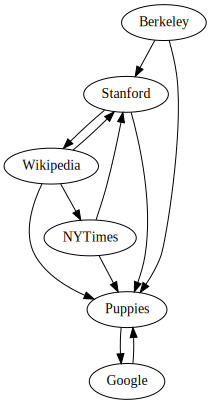

In [90]:
#Creates the visualisation of Graph 2
dot2 = Digraph()

dot2.edge('Stanford', 'Wikipedia')
dot2.edge('Stanford', 'Puppies')
dot2.edge('Wikipedia', 'Stanford')
dot2.edge('Wikipedia', 'NYTimes')
dot2.edge('Wikipedia', 'Puppies')
dot2.edge('NYTimes', 'Stanford')
dot2.edge('NYTimes', 'Puppies')
dot2.edge('Berkeley', 'Stanford')
dot2.edge('Berkeley', 'Puppies')
dot2.edge('Puppies', 'Google')
dot2.edge('Google', 'Puppies')


#dot2.view() 
dot2

Play around with above SCC Code -- Try applying it on the Australian cities data we had before.

### <font color='red'> Activity 5 - Code Reflections. </font>

In [ ]:
#### TODO ####
### Good Luck ###
'''
Slight tweaks needed to be made in both the node and graph classes in order to allow strongly connected components to be added.
The node class was given 2 new attributes ( time in and time out)
The graph class was supplemented with a reverse edges method.
This is imperative in the finding strongly connected components 
Once a DFS is run the edges must be reversed then the DFS runs again from the node with the highest finish time. 
As was taught in the module for a graph to have strongly connected components it needs to have nodes which have edges coming both in and out. 
Simply put for v,w in V there must be a path from v to w and from w to v.
Like in the module there are 3 DFS trees in the DFS forest.
Google and puppies = DFS tree 1
Berkeley = DFS tree 2
NYTimes, Stanford, and Wikepedia = DFS tree 3
I also ran the SCC algorithm on the original cities graph. As is expected every city was seperate and no multiple cities were strongly connected
This is because the city graph did not have any edges going back in only outward

'''

***